ACF =
   auto correlation function

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("/content/air_csv_2.csv", index_col='Month', parse_dates=True)

In [ ]:
df

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [ ]:
df.isna().sum()

Passengers    0
dtype: int64

In [ ]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [ ]:
df

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


In [ ]:
import calendar

In [ ]:
df.head()

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121


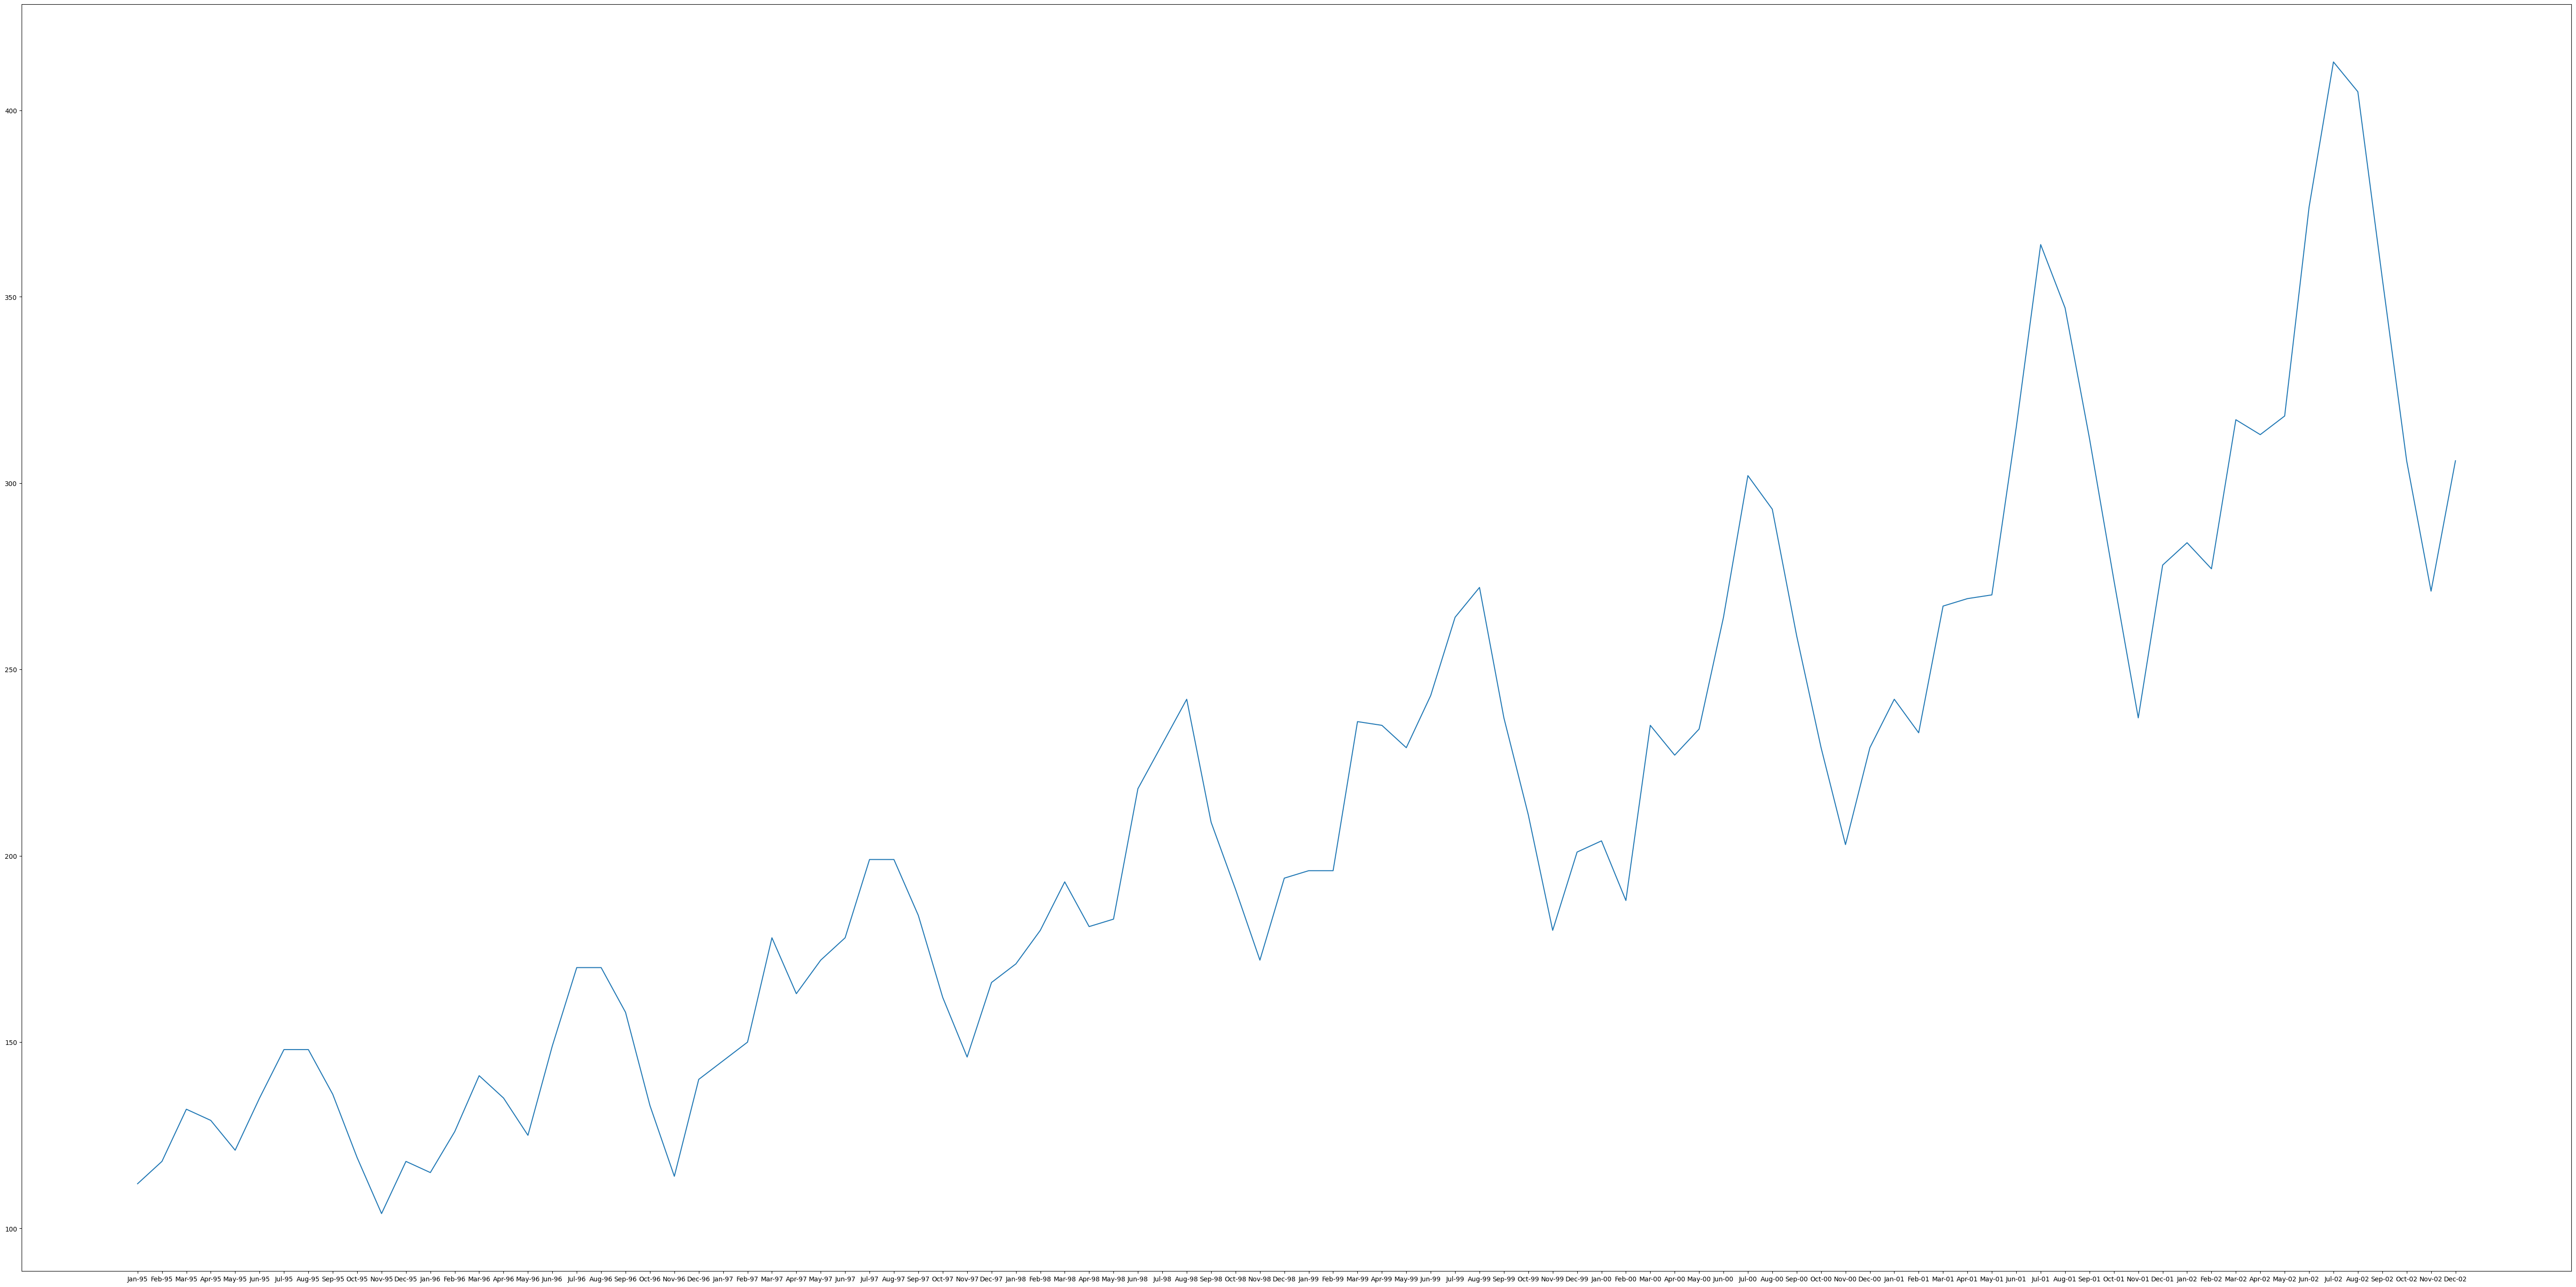

In [ ]:
plt.figure(figsize=(70,35))
plt.plot(df)

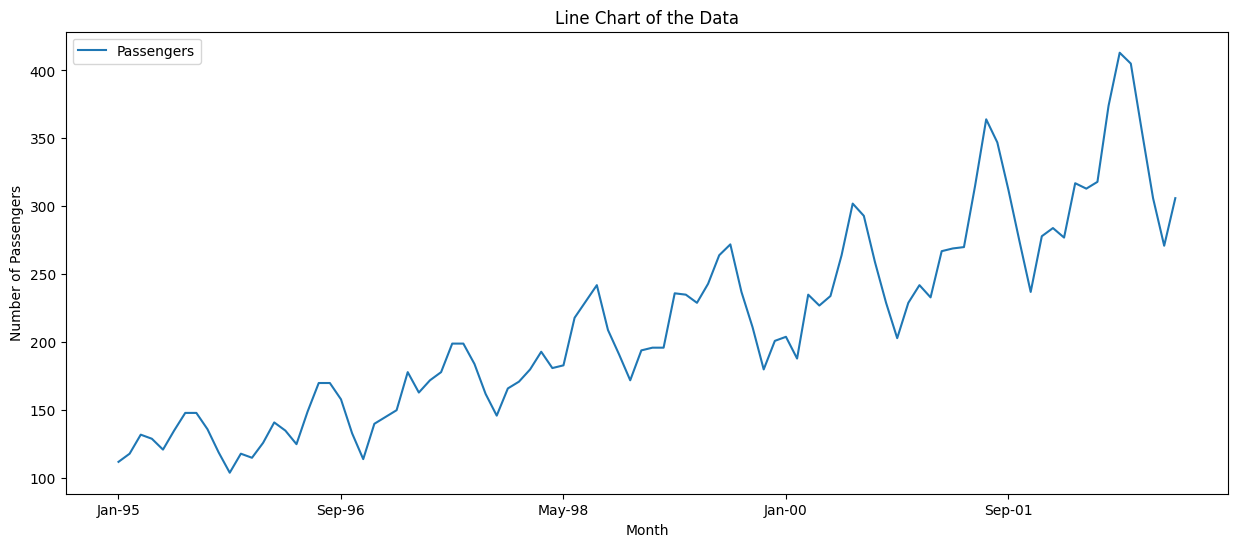

In [ ]:
df.plot(kind='line', figsize=(15, 6))
plt.title('Line Chart of the Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

the air line data set shows the no of passanges per month from 1995 to 2002 .
AutoCorrelation teells you the passangers of this month and previous month. if lats month lag(1)

the more lags you use, the lower the correaltion will be. more recent periods have more impact.latest data impacts more or corelated on the price of product like new trends.

In [ ]:
### data is non stationery convert it into stationery data

In [ ]:
df['pass_diff']=df['Passengers'].diff(periods=1)   ## applied diff on pasangers lag=1

In [ ]:
df.head()

,Passengers,pass_diff
Month,,
Jan-95,112,NaN
Feb-95,118,6.0
Mar-95,132,14.0
Apr-95,129,-3.0
May-95,121,-8.0


In [ ]:
df=df.dropna()

In [ ]:
df.head()

,Passengers,pass_diff
Month,,
Feb-95,118,6.0
Mar-95,132,14.0
Apr-95,129,-3.0
May-95,121,-8.0
Jun-95,135,14.0


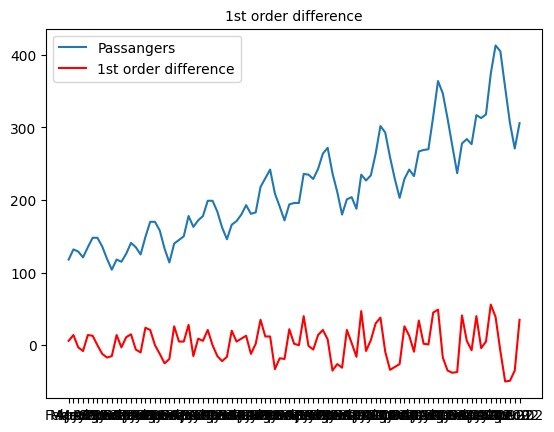

In [ ]:
## plot
plt.title("1st order difference", size=10)
plt.plot(df['Passengers'], label='Passangers')
plt.plot(df['pass_diff'], label = '1st order difference', color='red')
plt.legend()

In [ ]:
## calculate autocorrelation
acf_values = acf(df['pass_diff'])
np.round(acf_values,2)

array([ 1.  ,  0.25, -0.16, -0.19, -0.3 , -0.08,  0.05, -0.11, -0.29,
       -0.13, -0.14,  0.23,  0.77,  0.2 , -0.15, -0.14, -0.23, -0.03,
        0.01, -0.09])

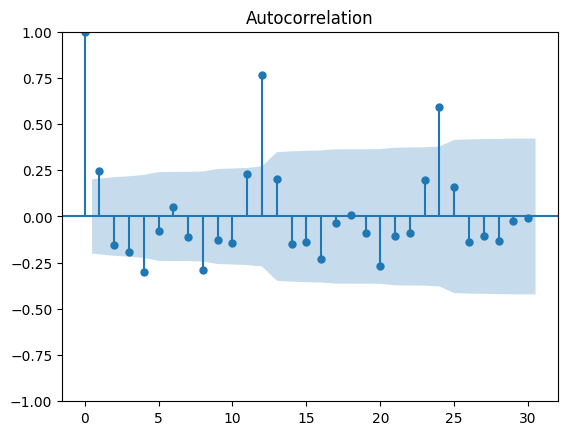

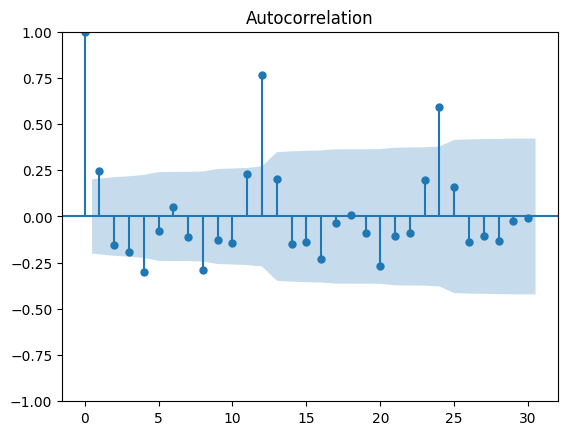

In [ ]:
## plot ACF
plot_acf(df['pass_diff'], lags=30)
## shadeed region is standard error region
## 1st values wil be 1 always

## in december peoples like to travel after 12 moths there is grow in numbers

### Partial Autocorrealtion Function

In [ ]:
## PACF

In [ ]:
## calculate pacf
## it will give direct values
pacf_values = pacf(df['pass_diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.25, -0.24, -0.1 , -0.3 ,  0.02, -0.08, -0.25, -0.45,
       -0.22, -0.65, -0.37,  0.59, -0.12, -0.28,  0.26,  0.  , -0.1 ,
       -0.29,  0.39])

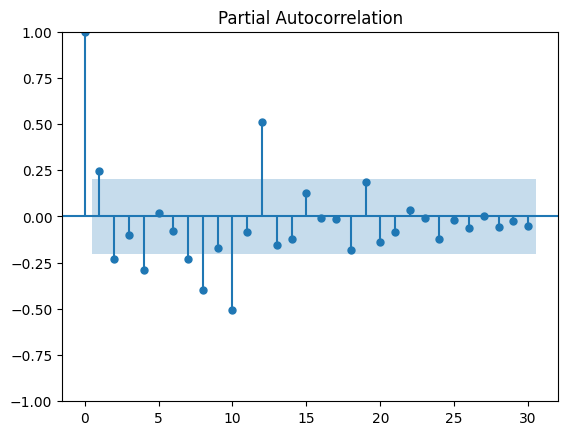

In [ ]:
## plot pacf
plot_pacf(df['pass_diff'], lags=30);

In [ ]:
## Till now i have checked

Build Model

In [ ]:
## models like
## Linear model
## exponential model
## Quadratic model
## Additive model
## Additive seasonality model
## Multiplicative model

## depends on curve of the data
## calculate rmse values

In [ ]:
## in my airline data set there is no t value and log value and squared values so i have to get
## ready my data with the help of excel and formulas and the applied one hot encodeing in python

In [ ]:
## lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/air_csv_2.csv')

In [ ]:
df1.head()

,Month,Passengers,t,log_pass,t_squared
0,Jan-95,112,1,2.049218,1
1,Feb-95,118,2,2.071882,4
2,Mar-95,132,3,2.120574,9
3,Apr-95,129,4,2.110590,16
4,May-95,121,5,2.082785,25


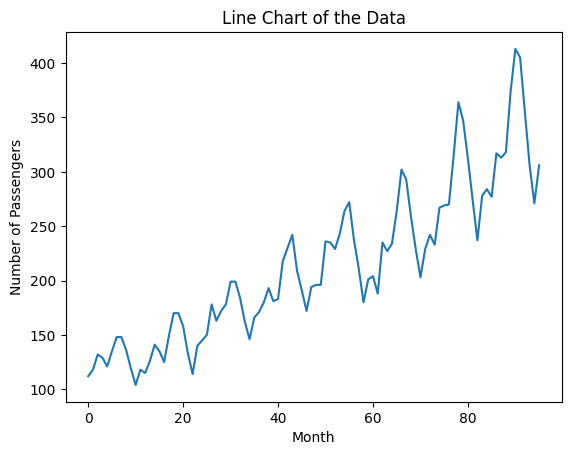

In [ ]:
df1['Passengers'].plot()
plt.title('Line Chart of the Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv('/content/air_csv_2.csv')

# Create dummy variables for the "Month" column
month_dummies = pd.get_dummies(df1["Month"], drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, month_dummies], axis=1)

# Print the first five rows of the new DataFrame
print(df1.head())
## i have taken google colab ai help for this code

In [ ]:
df1.head()

,Month,Passengers,t,log_pass,t_squared,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,...,Oct-98,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99
0,Jan-95,112,1,2.049218,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Feb-95,118,2,2.071882,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mar-95,132,3,2.120574,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Apr-95,129,4,2.110590,16,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,May-95,121,5,2.082785,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.shape

(96, 101)

In [ ]:
df1.dtypes

Month          object
Passengers      int64
t               int64
log_pass      float64
t_squared       int64
               ...   
Sep-95          uint8
Sep-96          uint8
Sep-97          uint8
Sep-98          uint8
Sep-99          uint8
Length: 101, dtype: object

In [ ]:
## extract Date from moth column
df1["Date"] = pd.to_datetime(df1.Month, format="%b-%y")   ## %b - month ## %y = year

In [ ]:
df1.head()

,Month,Passengers,t,log_pass,t_squared,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,...,Oct-99,Sep-00,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99,Date
0,Jan-95,112,1,2.049218,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995-01-01
1,Feb-95,118,2,2.071882,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995-02-01
2,Mar-95,132,3,2.120574,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995-03-01
3,Apr-95,129,4,2.110590,16,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995-04-01
4,May-95,121,5,2.082785,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995-05-01


In [ ]:
df1.dtypes

Month                 object
Passengers             int64
t                      int64
log_pass             float64
t_squared              int64
                   ...      
Sep-96                 uint8
Sep-97                 uint8
Sep-98                 uint8
Sep-99                 uint8
Date          datetime64[ns]
Length: 102, dtype: object

In [ ]:
##extracting month and year
df1['month'] = df1.Date.dt.strftime("%b") ## month extraction
df1['year'] = df1.Date.dt.strftime("%y")  ## year extraction

In [ ]:
df1.head()

,Month,Passengers,t,log_pass,t_squared,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,...,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99,Date,month,year
0,Jan-95,112,1,2.049218,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-01-01,Jan,95
1,Feb-95,118,2,2.071882,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-02-01,Feb,95
2,Mar-95,132,3,2.120574,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-03-01,Mar,95
3,Apr-95,129,4,2.110590,16,0,0,0,1,0,...,0,0,0,0,0,0,0,1995-04-01,Apr,95
4,May-95,121,5,2.082785,25,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-05-01,May,95


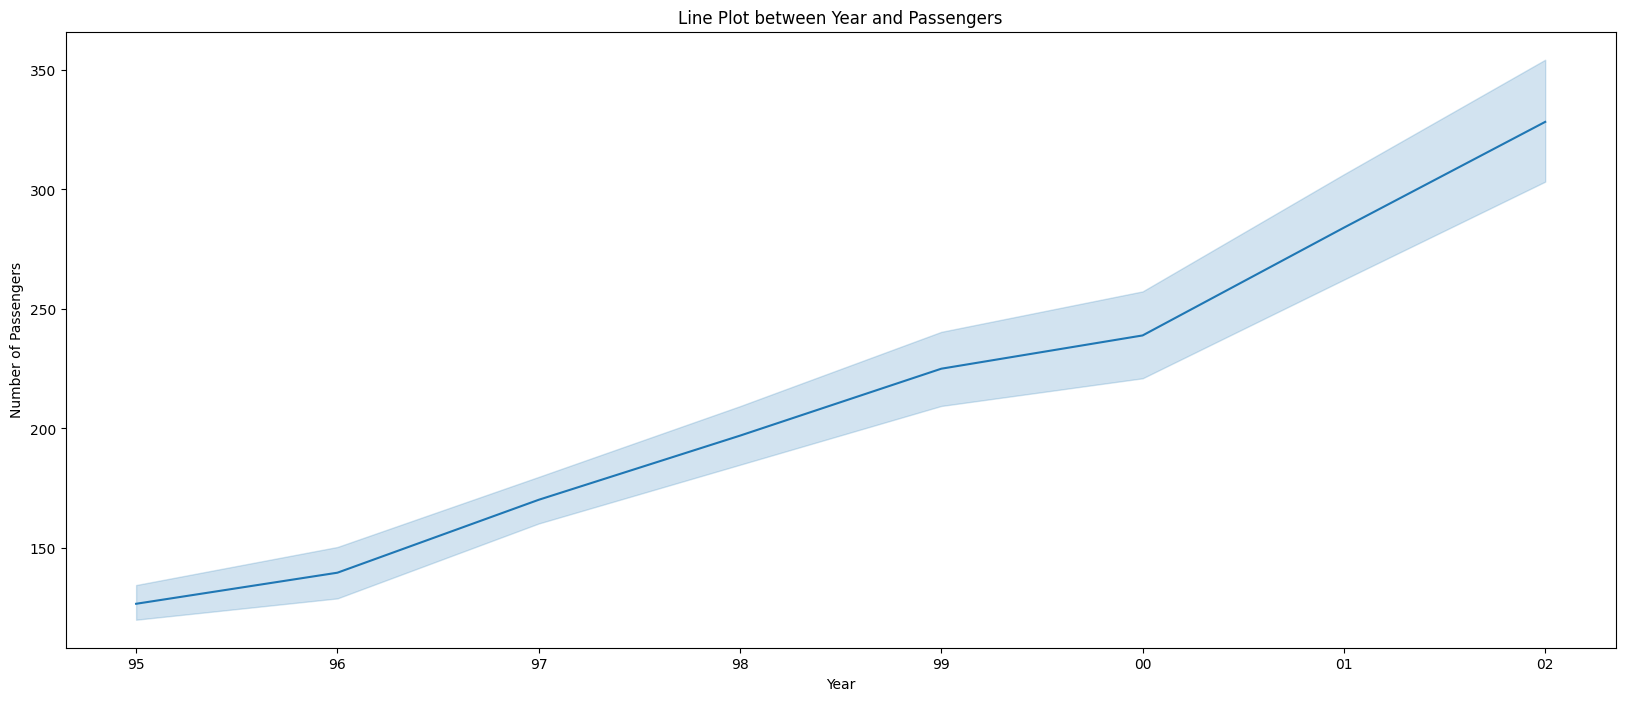

In [ ]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df1, x="year", y="Passengers")
plt.title('Line Plot between Year and Passengers')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()
## there is a increasing trend in passangers

In [ ]:
## my data is following linearly raising trend is there

### Data splitting

In [ ]:
df1.shape

(96, 104)

In [ ]:
df1.head(3)

,Month,Passengers,t,log_pass,t_squared,Apr-00,Apr-01,Apr-02,Apr-95,Apr-96,...,Sep-01,Sep-02,Sep-95,Sep-96,Sep-97,Sep-98,Sep-99,Date,month,year
0,Jan-95,112,1,2.049218,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-01-01,Jan,95
1,Feb-95,118,2,2.071882,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-02-01,Feb,95
2,Mar-95,132,3,2.120574,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-03-01,Mar,95


In [ ]:
import re

for col in df1.columns:
  if re.match(r'^[A-Z][a-z]+-\d{2}$', col):
    new_col = re.sub(r'-\d{2}$', '', col)
    df1.rename(columns={col: new_col}, inplace=True)

df1.head()

,Month,Passengers,t,log_pass,t_squared,Apr,Apr,Apr,Apr,Apr,...,Sep,Sep,Sep,Sep,Sep,Sep,Sep,Date,month,year
0,Jan-95,112,1,2.049218,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-01-01,Jan,95
1,Feb-95,118,2,2.071882,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-02-01,Feb,95
2,Mar-95,132,3,2.120574,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-03-01,Mar,95
3,Apr-95,129,4,2.110590,16,0,0,0,1,0,...,0,0,0,0,0,0,0,1995-04-01,Apr,95
4,May-95,121,5,2.082785,25,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-05-01,May,95


In [ ]:
## split the data
## random spliting or sequential
## in forecasting we do sequential spliting
train = df1.head(80)
test = df1.tail(16)

In [ ]:
train

,Month,Passengers,t,log_pass,t_squared,Apr,Apr,Apr,Apr,Apr,...,Sep,Sep,Sep,Sep,Sep,Sep,Sep,Date,month,year
0,Jan-95,112,1,2.049218,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-01-01,Jan,95
1,Feb-95,118,2,2.071882,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-02-01,Feb,95
2,Mar-95,132,3,2.120574,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-03-01,Mar,95
3,Apr-95,129,4,2.110590,16,0,0,0,1,0,...,0,0,0,0,0,0,0,1995-04-01,Apr,95
4,May-95,121,5,2.082785,25,0,0,0,0,0,...,0,0,0,0,0,0,0,1995-05-01,May,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Apr-01,269,4,2.429752,16,0,1,0,0,0,...,0,0,0,0,0,0,0,2001-04-01,Apr,01
76,May-01,270,5,2.431364,25,0,0,0,0,0,...,0,0,0,0,0,0,0,2001-05-01,May,01
77,Jun-01,315,6,2.498311,36,0,0,0,0,0,...,0,0,0,0,0,0,0,2001-06-01,Jun,01
78,Jul-01,364,7,2.561101,49,0,0,0,0,0,...,0,0,0,0,0,0,0,2001-07-01,Jul,01


In [ ]:
test

,Month,Passengers,t,log_pass,t_squared,Apr,Apr,Apr,Apr,Apr,...,Sep,Sep,Sep,Sep,Sep,Sep,Sep,Date,month,year
80,Sep-01,312,9,2.494155,81,0,0,0,0,0,...,1,0,0,0,0,0,0,2001-09-01,Sep,01
81,Oct-01,274,10,2.437751,100,0,0,0,0,0,...,0,0,0,0,0,0,0,2001-10-01,Oct,01
82,Nov-01,237,11,2.374748,121,0,0,0,0,0,...,0,0,0,0,0,0,0,2001-11-01,Nov,01
83,Dec-01,278,12,2.444045,144,0,0,0,0,0,...,0,0,0,0,0,0,0,2001-12-01,Dec,01
84,Jan-02,284,1,2.453318,1,0,0,0,0,0,...,0,0,0,0,0,0,0,2002-01-01,Jan,02
85,Feb-02,277,2,2.442480,4,0,0,0,0,0,...,0,0,0,0,0,0,0,2002-02-01,Feb,02
86,Mar-02,317,3,2.501059,9,0,0,0,0,0,...,0,0,0,0,0,0,0,2002-03-01,Mar,02
87,Apr-02,313,4,2.495544,16,0,0,1,0,0,...,0,0,0,0,0,0,0,2002-04-01,Apr,02
88,May-02,318,5,2.502427,25,0,0,0,0,0,...,0,0,0,0,0,0,0,2002-05-01,May,02
89,Jun-02,374,6,2.572872,36,0,0,0,0,0,...,0,0,0,0,0,0,0,2002-06-01,Jun,02


In [ ]:
## find rmse =  we dont have direct function rmse but we have mean squared error
## calculate mean square error and root of mean square error for rmse
from sklearn.metrics import mean_squared_error
## best model = minimum values which gives

In [ ]:
## linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t', data=train).fit()  ## we are predcting for months pass is our dependent on t month
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'], pred_linear))
rmse_linear

130.44491791353667

In [ ]:
## Exponential model
## insted of pass we will take log values of pass.
exp = smf.ols('log_pass~t', data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'], pred_exp))
rmse_exp

316.35267482107815

In [ ]:
## Quadratic model

quad = smf.ols('Passengers~t+t_squared', data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'], pred_quad))  ## y variable is pass
rmse_quad

129.90465379761125

In [ ]:
## Additive seasonality model - pass monthly data jan to nov
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()

In [143]:
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))  ## predcting values upon months data

In [144]:
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea_quad

148.22767772735438

In [145]:
## Additive seasonality quadratic model ## just usig t and t squred value
add_sea_quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()

In [146]:
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))  ## predcting values upon months data

In [147]:
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_quad))
rmse_add_sea_quad

126.27869077334663

In [148]:
## multiplicative seasonality
mul_sea = smf.ols('log_pass~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov', data=train).fit()

In [149]:
pred_mul_sea = pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

In [150]:
rmse_mul_sea = np.sqrt(mean_squared_error(test['Passengers'], pred_mul_sea))
rmse_mul_sea

316.38922178086244

In [ ]:
### we get low in Additive seasonality quadratic model '126'

In [153]:
## compare the results

data = {"model":pd.Series(['linear','exponential','quadratic','additive seasonality','additive seas quad','multi seas']),
            "rmse_values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea_quad,rmse_add_sea_quad,rmse_mul_sea])}
tabel_rmse=pd.DataFrame(data)
tabel_rmse.sort_values(["rmse_values"])

,model,rmse_values
3,additive seasonality,126.278691
4,additive seas quad,126.278691
2,quadratic,129.904654
0,linear,130.444918
1,exponential,316.352675
5,multi seas,316.389222
